<a href="https://colab.research.google.com/github/ThoshitaMovva/Python/blob/master/DL%20ICP6%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wait for 8 seconds...
TensorBoard link:
http://514bd19b.ngrok.io
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.5191 - acc: 0.4497 - val_loss: 0.4262 - val_acc: 1.2755e-07
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.3933 - acc: 0.4931 - val_loss: 0.3735 - val_acc: 1.2755e-07
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.3736 - acc: 0.4948 - val_loss: 0.3654 - val_acc: 1.2755e-07
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.3678 - acc: 0.4959 - val_loss: 0.3591 - val_acc: 1.2755e-07
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.3604 - acc: 0.4972 - val_loss: 0.3487 - val_acc: 1.2755e-07
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.3525 - acc: 0.4981 - val_loss: 0.3411 - val_acc: 1.2755e-07
Epoch 7/20
60000/60000 [===============

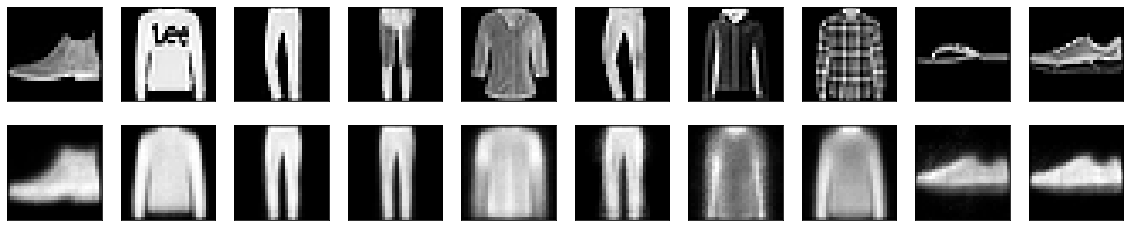

Saved model to disk


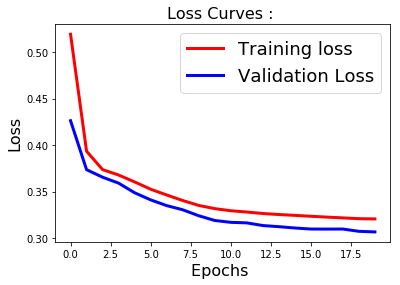

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
import os
from keras.callbacks import TensorBoard
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)


# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-7))(encoded)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



'''ENCODE_DIR = os.getcwd()
tensorboard = TensorBoard(log_dir='ENCODE_DIR', histogram_freq=0,
                         write_graph=True, write_images=False)'''
from tensorboardcolab import *
tbc=TensorBoardColab()

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy),callbacks=[TensorBoardColabCallback(tbc)])



# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Saving the model

from keras.models import model_from_json

# serialize model to JSON
model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
autoencoder.save_weights("model.h5")
print("Saved model to disk")


fig1 = plt.figure()
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves : ', fontsize=16)
fig1.savefig('loss_lstm.png')


Wait for 8 seconds...
TensorBoard link:
https://cfe82434.ngrok.io
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.5104 - acc: 0.4518 - val_loss: 0.4186 - val_acc: 0.4874
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3910 - acc: 0.4916 - val_loss: 0.3775 - val_acc: 0.4930
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3708 - acc: 0.4951 - val_loss: 0.3680 - val_acc: 0.4905
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.3579 - acc: 0.4980 - val_loss: 0.3520 - val_acc: 0.4994
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3479 - acc: 0.4999 - val_loss: 0.3448 - val_acc: 0.4970
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3398 - acc: 0.5014 - val_loss: 0.3371 - val_acc: 0.5018
Epoch 7/20
60000/60000 [==============================] - 5s 8

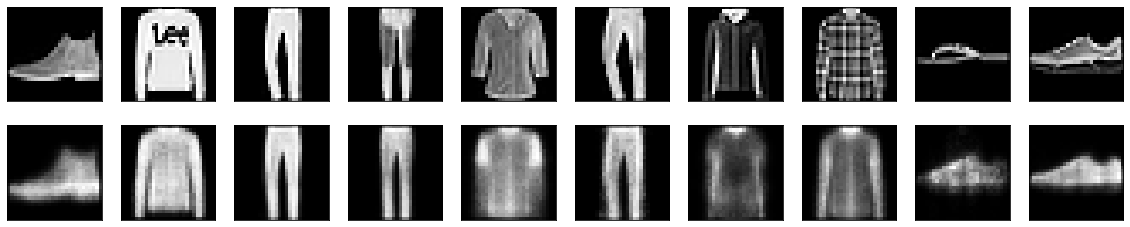

Saved model to disk


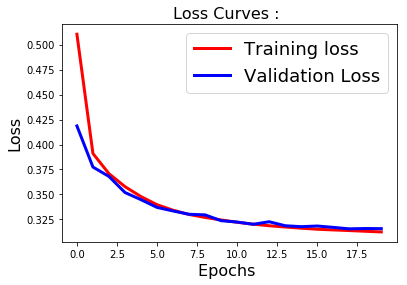

In [12]:
from keras.layers import Input, Dense
from keras.models import Model
import os
from keras.callbacks import TensorBoard
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)


# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-7))(encoded)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



'''ENCODE_DIR = os.getcwd()
tensorboard = TensorBoard(log_dir='ENCODE_DIR', histogram_freq=0,
                         write_graph=True, write_images=False)'''
from tensorboardcolab import *
tbc=TensorBoardColab()

#introducing noise
#noise_factor = 0.5
#x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])



# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Saving the model

from keras.models import model_from_json

# serialize model to JSON
model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
autoencoder.save_weights("model.h5")
print("Saved model to disk")


fig1 = plt.figure()
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves : ', fontsize=16)
fig1.savefig('loss_lstm.png')
